# 광주 인공지능 사관학교
- - -
- 작성자 : 2반 한지호
- 작성일 : 20.07.14 화
- 5교시 머신러닝 시간에 작성한 데이터 시각화 연습 파일

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'D:/ai_school/practice/07.14-DV_practice/Traffic_Accident_2017.csv', encoding='euc-kr')

In [2]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,4055,4056,4057,4058,4059,4060,4061,4062,4063,4064
발생년,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017
발생년월일시,2017010101,2017010102,2017010102,2017010102,2017010104,2017010104,2017010105,2017010109,2017010118,2017010120,...,2017123023,2017123100,2017123107,2017123112,2017123117,2017123118,2017123118,2017123119,2017123120,2017123123
발생분,15,28,43,22,37,0,50,25,33,0,...,50,50,4,10,56,10,25,55,40,15
주야,야간,야간,야간,야간,야간,야간,야간,주간,야간,야간,...,야간,야간,주간,주간,주간,야간,야간,야간,야간,야간
요일,일,일,일,일,일,일,일,일,일,일,...,토,일,일,일,일,일,일,일,일,일
사망자수,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
사상자수,2,1,2,1,1,2,1,5,3,7,...,6,1,1,1,1,4,1,1,11,1
중상자수,1,0,0,0,0,1,0,3,1,4,...,2,0,0,0,0,1,0,0,1,0
경상자수,0,0,1,0,0,0,0,1,1,2,...,3,0,0,0,0,0,0,0,9,0
부상신고자수,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [3]:
# 사고가 가장 많이 난 요일은?
data['요일'].value_counts() 

화    608
월    603
금    603
토    596
목    586
수    565
일    504
Name: 요일, dtype: int64

In [4]:
# 한글 폰트 깨짐 문제 해결
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

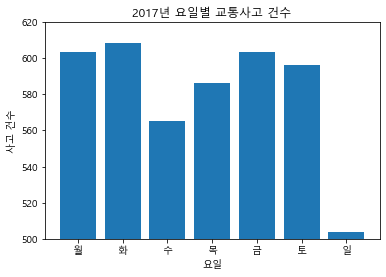

In [5]:
t = data['요일'].value_counts()
y = t[['월', '화', '수', '목', '금', '토', '일']]
x = ['월', '화', '수', '목', '금', '토', '일'] 

plt.ylim(500, 620)

plt.title('2017년 요일별 교통사고 건수')
plt.xlabel('요일')
plt.ylabel('사고 건수')

plt.bar(x, y)
plt.show() 

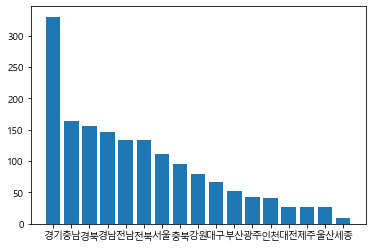

In [6]:
# 차대차 사고발생 시도 시각화
tmp_df = data[['발생지시도', '사고유형_대분류']][data['사고유형_대분류'] == '차대차']  
tmp_df = tmp_df['발생지시도'].value_counts() 
x = tmp_df.index
y = tmp_df.values

plt.bar(x, y)
plt.show() 

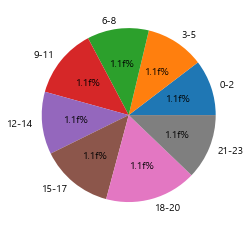

In [7]:
# 사고 시간대별 시각화
# 0~2, 3~5, 6~8, ... 18~20, 21~23시 8개의 구간 (카테고리) 
bins = [-1,2,5,8,11,14,17,20,24] # 0을 포함시키기 위해 -1로 시작
labels = ['0-2', '3-5', '6-8', '9-11', '12-14', '15-17', '18-20','21-23']

temp_df = data['발생년월일시'] % 100
temp_df.value_counts().sort_index()

t = pd.cut(temp_df.values, bins, labels=labels)
r = t.value_counts()

plt.pie(r, labels=labels, autopct='1.1f%%') 
plt.show() 

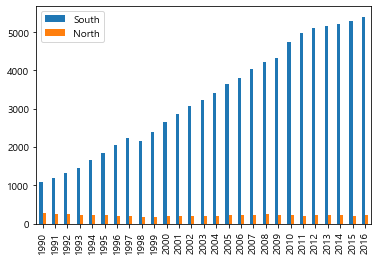

In [8]:
# Pandas로 시각화
import pandas as pd

df = pd.read_excel('남북한발전전력량.xlsx')

df_ns = df.iloc[[0, 5], 2:] 
df_ns.index = ['South', 'North']
# 텍스트로 들어있는 값들을 숫자로 변환
df_ns.columns = df_ns.columns.map(int)
df_ns = df_ns.T
df_ns.plot(kind='bar') 

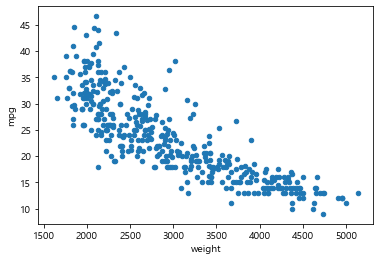

In [9]:
# 차량 연비 데이터
df = pd.read_csv('auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']

df.plot(x='weight', y='mpg', kind='scatter')